# Raport z eksploracji danych - wpływ COVID-19 na gospodarkę

## Zmiany PKB w drugim kwartale 2020 a Covid
W tej części zajęliśmy się badaniem wpływu pandemii na procentowe zmiany PKB w wybranych krajach. Skupiliśmy się na krajach należących do G20 oraz Polsce. Chcieliśmy najpierw porównać ilość zgonów w drugim kwartale i zmiany w PKB w tych krajach.


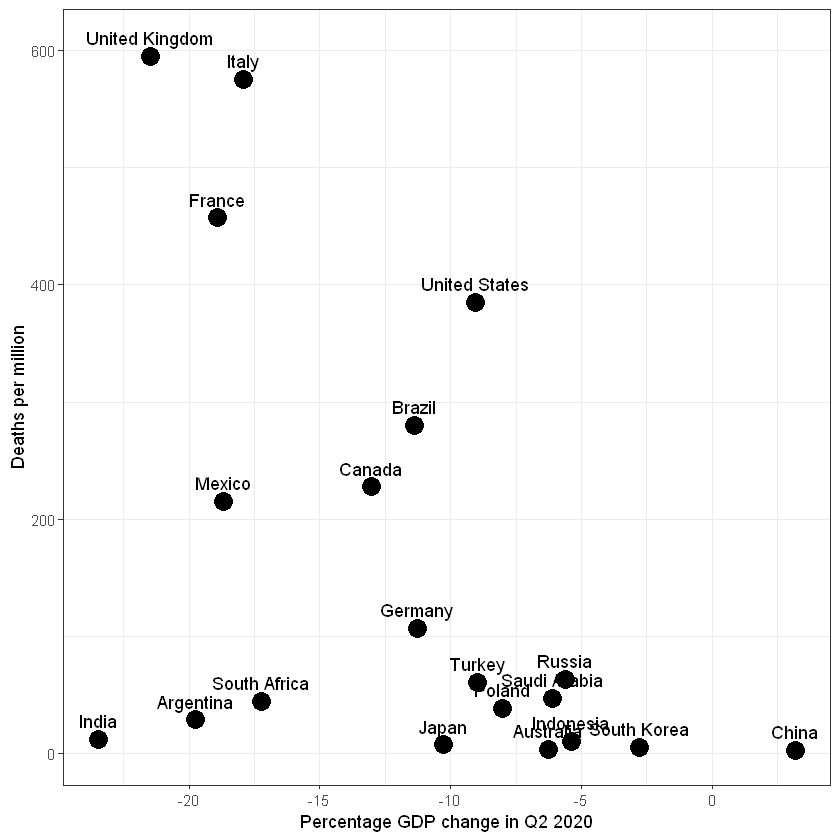

In [6]:
library(dplyr)
library(ggplot2)
library(ggthemes)

#  Operacje na dużych ramkach danych
#df1 <- df %>% filter(TIME=="2020-Q2")
#df1 <- df1 %>% filter(MEASURE=="GYSA") %>% add_row(Country="Poland", Value=-8)
#df1 <- df1 %>% mutate(Country = replace(Country, Country=="China (People's Republic of)", "China") )
#df1 <- df1 %>% mutate(Country = replace(Country, Country=="Korea", "South Korea") )
#df2 <- read.csv("OECD-Data.csv")
#df3 <- df2 %>% filter(TIME=="2020-Q2" && Unit=="Percentage")
#WIELKAdf <- read.csv("G20-Deaths.csv")
#dfD <- WIELKAdf %>% mutate(date=as.Date(date, format='%Y-%m-%d'))
#dfD <-dfD %>% filter(date=="2020-07-01")
#dfD <- dfD %>% choose(location, total_deaths_per_million, total_tests_per_thousand) 

#G20 <- inner_join(df1, dfD, by=c("Country"="location"))
#G20 <- G20 %>% select(Country, total_deaths_per_million, Value, total_tests_per_thousand) 

#write.csv(G20, "G20.csv")


G20 <- read.csv("G20.csv")
w <-ggplot(G20, aes(x=Value, y=total_deaths_per_million, label=Country))+
  geom_point(size=5)+
  geom_text(vjust=0, nudge_y=10)+theme_bw()+labs(x="Percentage GDP change in Q2 2020", y="Deaths per million")
w

Jak widzimy, generalnie wydaje się że jest związek pomiędzy większa liczbą śmierci na milion mieszkańców i większą negatywną zmianą PKB. Jedynie Indie wydają się bardzo odstawać od reszty. Chcieliśmy też zbadać związek pomiędzy zmianą PKB a ilością wykonywanych testów na tysiąc mieszkańców, ale tu nie znaleźliśmy żadnego związku. Dodatkowo nasze dane nie zawierały wszystkich informacji o testach. 

Warning message:
"Removed 6 rows containing missing values (geom_point)."Warning message:
"Removed 6 rows containing missing values (geom_text)."

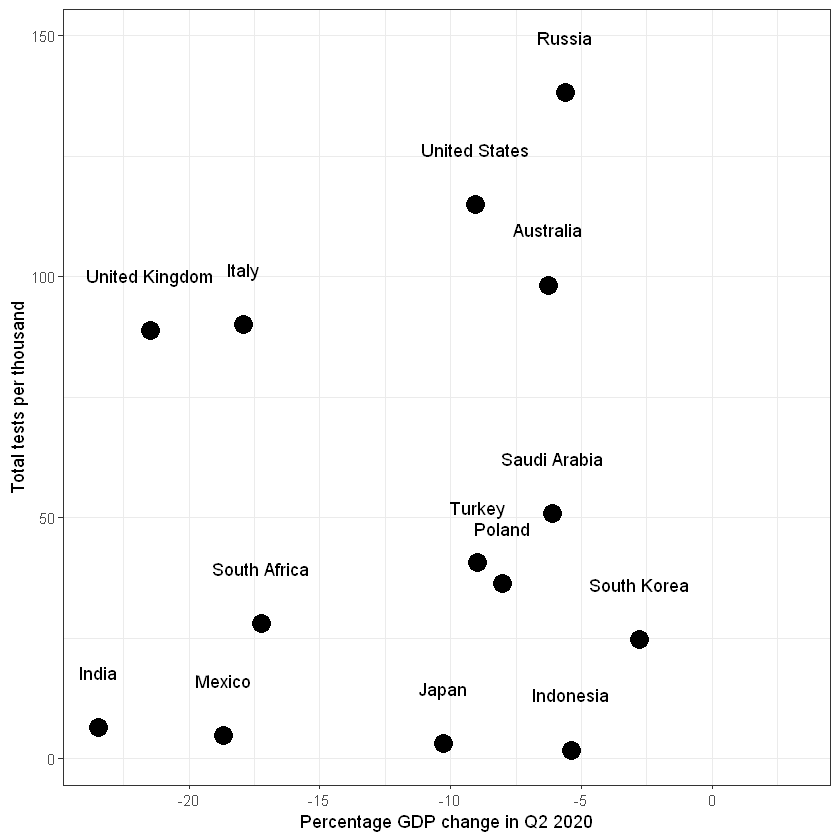

In [5]:
z <- ggplot(G20, aes(x=Value, y=total_tests_per_thousand, label=Country))+
  geom_point(size=5)+
  geom_text(vjust=0, nudge_y=10)+theme_bw()+labs(x="Percentage GDP change in Q2 2020", y="Total tests per thousand")
z 

## Wpływ covidu na akcje spółek giełdowych 
W drugiej części skupiamy się na wpływie pandemii na akcje poszczególnych sektorów i spółek.

In [14]:

SCI <- read.csv("SCI.csv")
HI <- read.csv("HI.csv")
CSV <- read.csv("CSV.csv")
MATW <- read.csv("MATW.csv")
#COVID <- read.csv("owid-covid-data.csv")
NFLX <- read.csv("NFLX.csv")
indeks_glowny <- read.csv("GSPC.csv")
UAL <- read.csv("UAL.csv")
ZM <- read.csv("ZM.csv")
COVIDUSA <- read.csv("COVIDUSA.csv")
#
#COVIDUSA <- filter(COVID,location == "United States")
#COVIDUSA$date <-  as.Date(COVIDUSA$date)
#COVIDUSA <- filter(COVIDUSA, date > as.Date("2020-03-01"))
#COVIDUSA$tygodnie <- rep(1:(nrow(COVIDUSA) %/% 7),each =7)
#COVIDUSA <- COVIDUSA %>% select(tygodnie,new_cases) %>% group_by(tygodnie) %>% summarise(srednia_zakazen = mean(new_cases))
#write.csv(COVIDUSA,"COVIDUSA.csv")

COVIDUSA <- read.csv("COVIDUSA.csv")

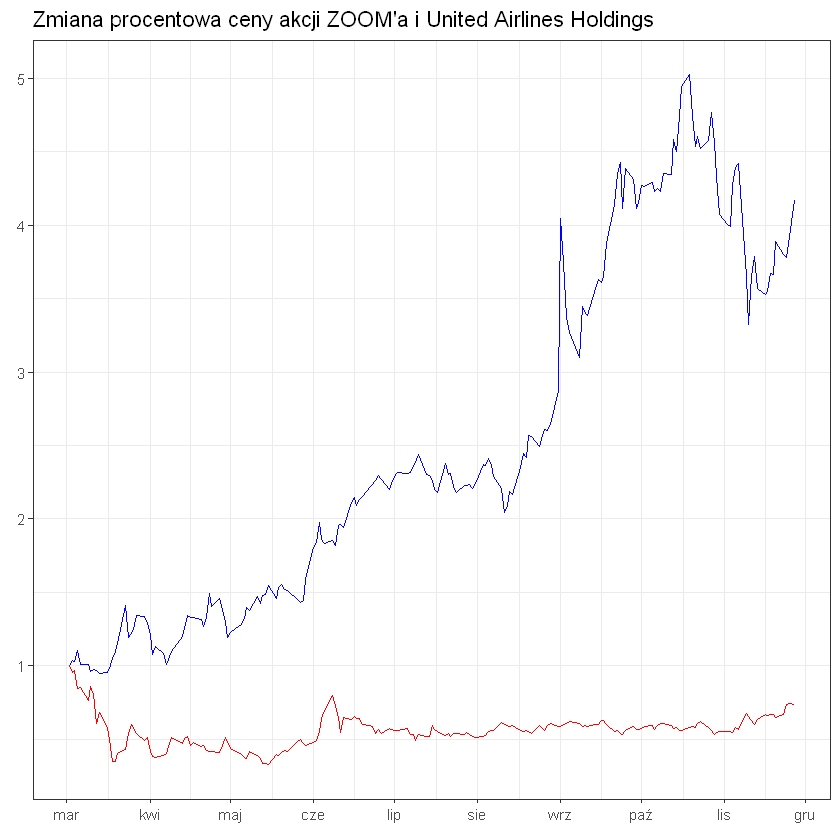

In [12]:
roznice_akcji <- inner_join(select(UAL,Date,Adj.Close),select(ZM,Date,Adj.Close),by = "Date")
UAL_pierwszy <- roznice_akcji$Adj.Close.x[1]
ZM_pierwszy <- roznice_akcji$Adj.Close.y[1]
roznice_akcji <- roznice_akcji %>% mutate(ual_procenty = Adj.Close.x/UAL_pierwszy, zm_procenty =Adj.Close.y/ZM_pierwszy)
ggplot(roznice_akcji, aes(x = as.Date(Date),group = 2)) + geom_line(aes(y=ual_procenty),color="red")+ geom_line(aes(y= zm_procenty),color="blue")  + scale_x_date(breaks = "1 month",date_labels = "%b" )+ 
  labs(title = "Zmiana procentowa ceny akcji ZOOM'a i United Airlines Holdings",y=element_blank(),x=element_blank())+theme_bw()

Na wykresie porównaliśmy jak zmieniały się w czasie akcje spółek z dwóch sektorów które skrajnie różnie radzą sobie z pandemią - linia czerwona to akcje linii lotniczych United Airlines, a niebieska to Zoom. Za punkt odniesienia przyjeliśmy ceny akcji tych spółek pierwszego marca.

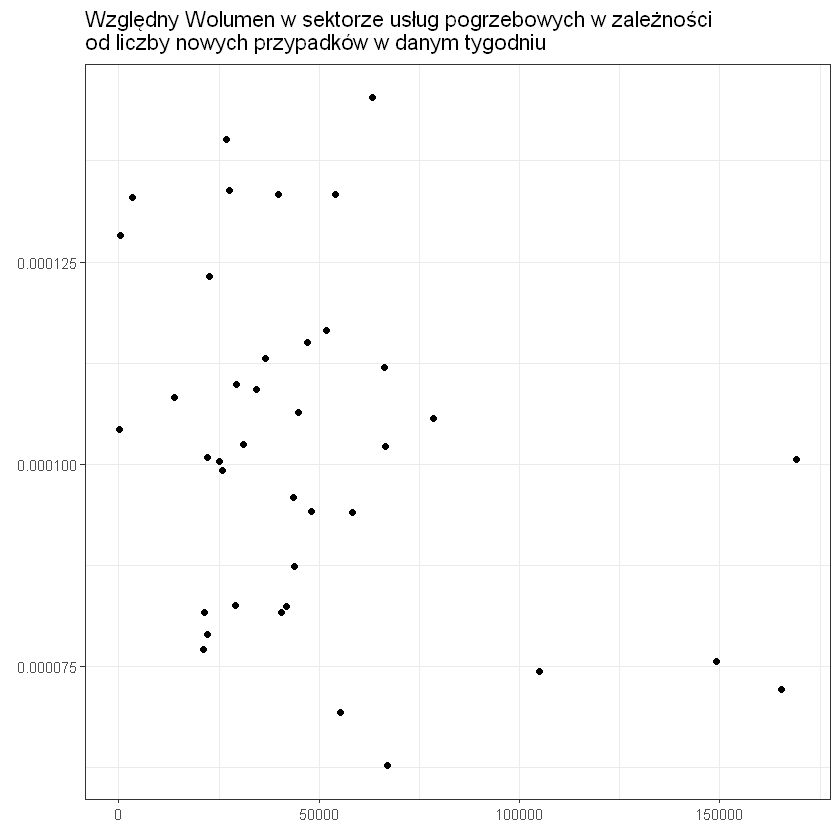

In [16]:
n <- rep(1:39,each = 5)
n <- n[-c(26,65,89,139,191)]
HI$tygodnie <- n
CSV$tygodnie <- n 
MATW$tygodnie <- n
SCI$tygodnie <- n 
NFLX$tygodnie <- n 
indeks_glowny$tygodnie <- n 
HI_V <- HI %>%  select(Volume,tygodnie) %>% group_by(tygodnie) %>% summarise(srednia = mean(Volume))
CSV_V <- CSV %>%  select(Volume,tygodnie) %>% group_by(tygodnie) %>% summarise(srednia = mean(Volume))
MATW_V <- MATW %>%  select(Volume,tygodnie) %>% group_by(tygodnie) %>% summarise(srednia = mean(Volume))
SCI_V <- SCI %>%  select(Volume,tygodnie) %>% group_by(tygodnie) %>% summarise(srednia = mean(Volume))
indeks_glowny_V <- indeks_glowny %>% select(Volume,tygodnie) %>% group_by(tygodnie) %>% summarise(srednia = mean(Volume))

Wolumeny <-rbind(HI_V,CSV_V,MATW_V,SCI_V) %>% group_by(tygodnie) %>%  summarise(srednia = mean(srednia))
Wolumeny <- inner_join(Wolumeny,indeks_glowny_V,by = "tygodnie") %>% mutate(wzgledny_wolumen = srednia.x/srednia.y)
Wolumeny_wykres <- inner_join(COVIDUSA,Wolumeny,by = "tygodnie")
ggplot(Wolumeny_wykres,aes(x=srednia_zakazen,y=wzgledny_wolumen)) + geom_point() + labs(title ="Względny Wolumen w sektorze usług pogrzebowych w zależności\nod liczby nowych przypadków w danym tygodniu", x = element_blank(), y = element_blank())+
theme_bw()

Na wykresie przedstawiliśmy względny wolumen w sektorze usług pogrzebowych w zależności od liczby nowych przypadków - czyli chcieliśmy sprawdzić, czy rozwój pandemii wpływa na większe zainteresowanie akcjami firm pogrzebowych.  Jednak wydaje się, że nasze przypuszczenia sie nie sprawdziły - nie widzimy tu większych zależności. Podobnie jak nie zauważyliśmy większych zależności w następnym wykresie, który przedstawia zależność pomiędzy zyskami dla inwestujących w danym tygodniu w Netflixa, a liczbą nowych przypadków w USA.

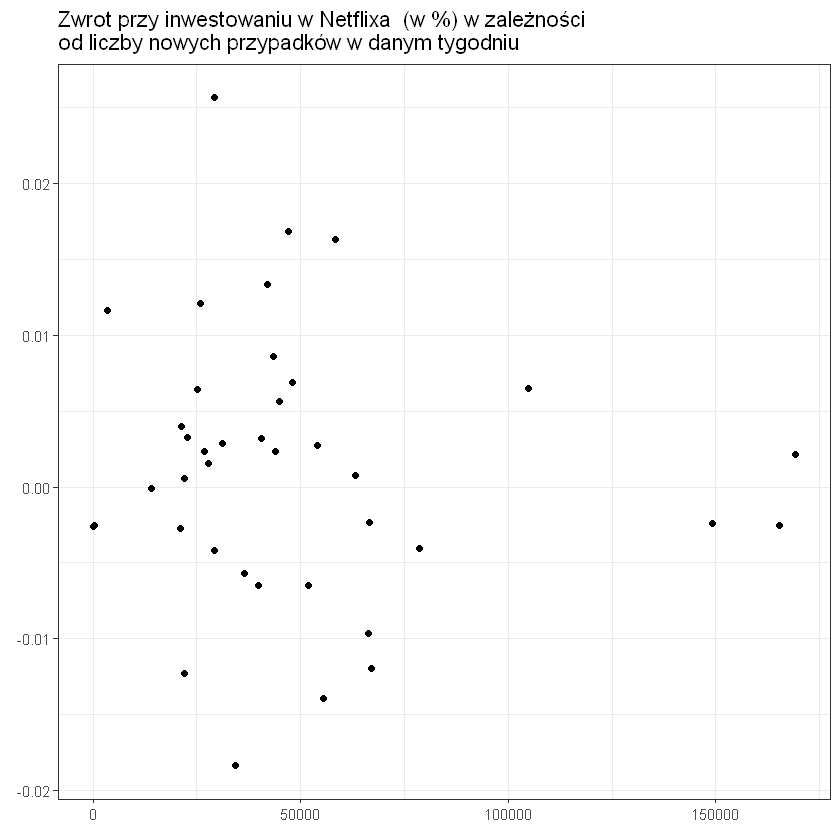

In [18]:
NFLX_S <-  NFLX %>% mutate(stopa = (Close/Open-1))  %>% group_by(tygodnie) %>% summarise(srednia = mean(stopa))
NFLX_wykres_S <- inner_join(select(NFLX_S,tygodnie,srednia),COVIDUSA,by = "tygodnie")
ggplot(NFLX_wykres_S,aes(x=srednia_zakazen,y=srednia)) + geom_point() + labs(title ="Zwrot przy inwestowaniu w Netflixa  (w %) w zależności\nod liczby nowych przypadków w danym tygodniu", x = element_blank(), y = element_blank())+
theme_bw()

## Źródła 
- https://ourworldindata.org/coronavirus
- https://finance.yahoo.com/
- https://stats.oecd.org/index.aspx?queryid=33940